# **IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler, LabelEncoder, OneHotEncoder,Normalizer,Binarizer,PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score,classification_report,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# ***TIỀN XỬ LÍ DỮ LIỆU***

In [2]:
data_math = pd.read_csv('student-mat.csv', delimiter=';')
data_por = pd.read_csv('student-por.csv', delimiter=';')
# Add a column to specify the course
data_math['subject'] = 'math'
data_por['subject'] = 'portuguese'
# Combine the two datasets
combined_data = pd.concat([data_math, data_por], ignore_index=True)
data=combined_data
# Print the first few rows of the combined data
print(combined_data.head())
df = pd.DataFrame(data)
df.to_csv(r"products.csv", index=False)

#Type Conversion - Convert categorical data to numerical
data = pd.get_dummies(data, drop_first=True)

#Data Normalization
# Apply Min-Max Scaling for numerical features only (excluding the target column G3)
scaler = MinMaxScaler()
numerical_features = data.drop(columns=['G3'])  # Chỉ chọn các cột không phải là G3
scaled_features = scaler.fit_transform(numerical_features)
data_normalized = pd.DataFrame(scaled_features, columns=numerical_features.columns)
data_normalized['G3'] = data['G3']  # Thêm lại cột G3 vào dataframe

data_normalized.drop_duplicates(inplace=True)
data_normalized.to_csv('preprocessed_student_por.csv', index=False)

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  Dalc  Walc  health absences  G1  G2  G3 subject  
0        3     4     1     1       3        6   5   6   6    math  
1        3     3     1     1       3        4   5   5   6    math  
2        3     2     2     3       3       10   7   8  10    math  
3        2     2     1     1       5        2  15  14  15    math  
4        3     2     1     2       5        4   6  10  10    math  

[5 rows x 34 columns]


In [3]:
combined_data.columns[combined_data.isna().any()]

Index([], dtype='object')

In [4]:
combined_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
sorted(combined_data.G3.unique())

[0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [6]:
np.where(combined_data.columns == 'G3')

(array([32]),)

In [7]:
combined_data['remarks'] = 'na'
combined_data.iloc[0, 34] = 6
combined_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,remarks
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,math,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,math,na
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,math,na
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,math,na
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,math,na


In [8]:
for i in range(len(combined_data.G3)):
    grade = combined_data.iloc[i, 32]
    if grade < 10:
        combined_data.iloc[i, 34] = 'Poor'
    elif grade > 11 and grade <= 15:
        combined_data.iloc[i, 34] = 'Fair'
    else:
        combined_data.iloc[i, 34] = 'Excellent'

In [9]:
combined_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,remarks
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,math,Poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,math,Poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,math,Excellent
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,math,Fair
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,math,Excellent


In [10]:
print(combined_data.index.duplicated().sum())
print(combined_data.index.isnull().sum())

0
0


In [11]:
combined_data.columns[combined_data.isna().any()]

Index([], dtype='object')

In [12]:
combined_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'subject', 'remarks'],
      dtype='object')

In [13]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [14]:
combined_data = combined_data.drop_duplicates(subset = None, keep = 'first', inplace = False)
combined_data.shape

(1044, 35)

# **DATA VISUALIZATION**

In [15]:
combined_data['Sum_G']=combined_data['G3']+combined_data['G2']+combined_data['G1']

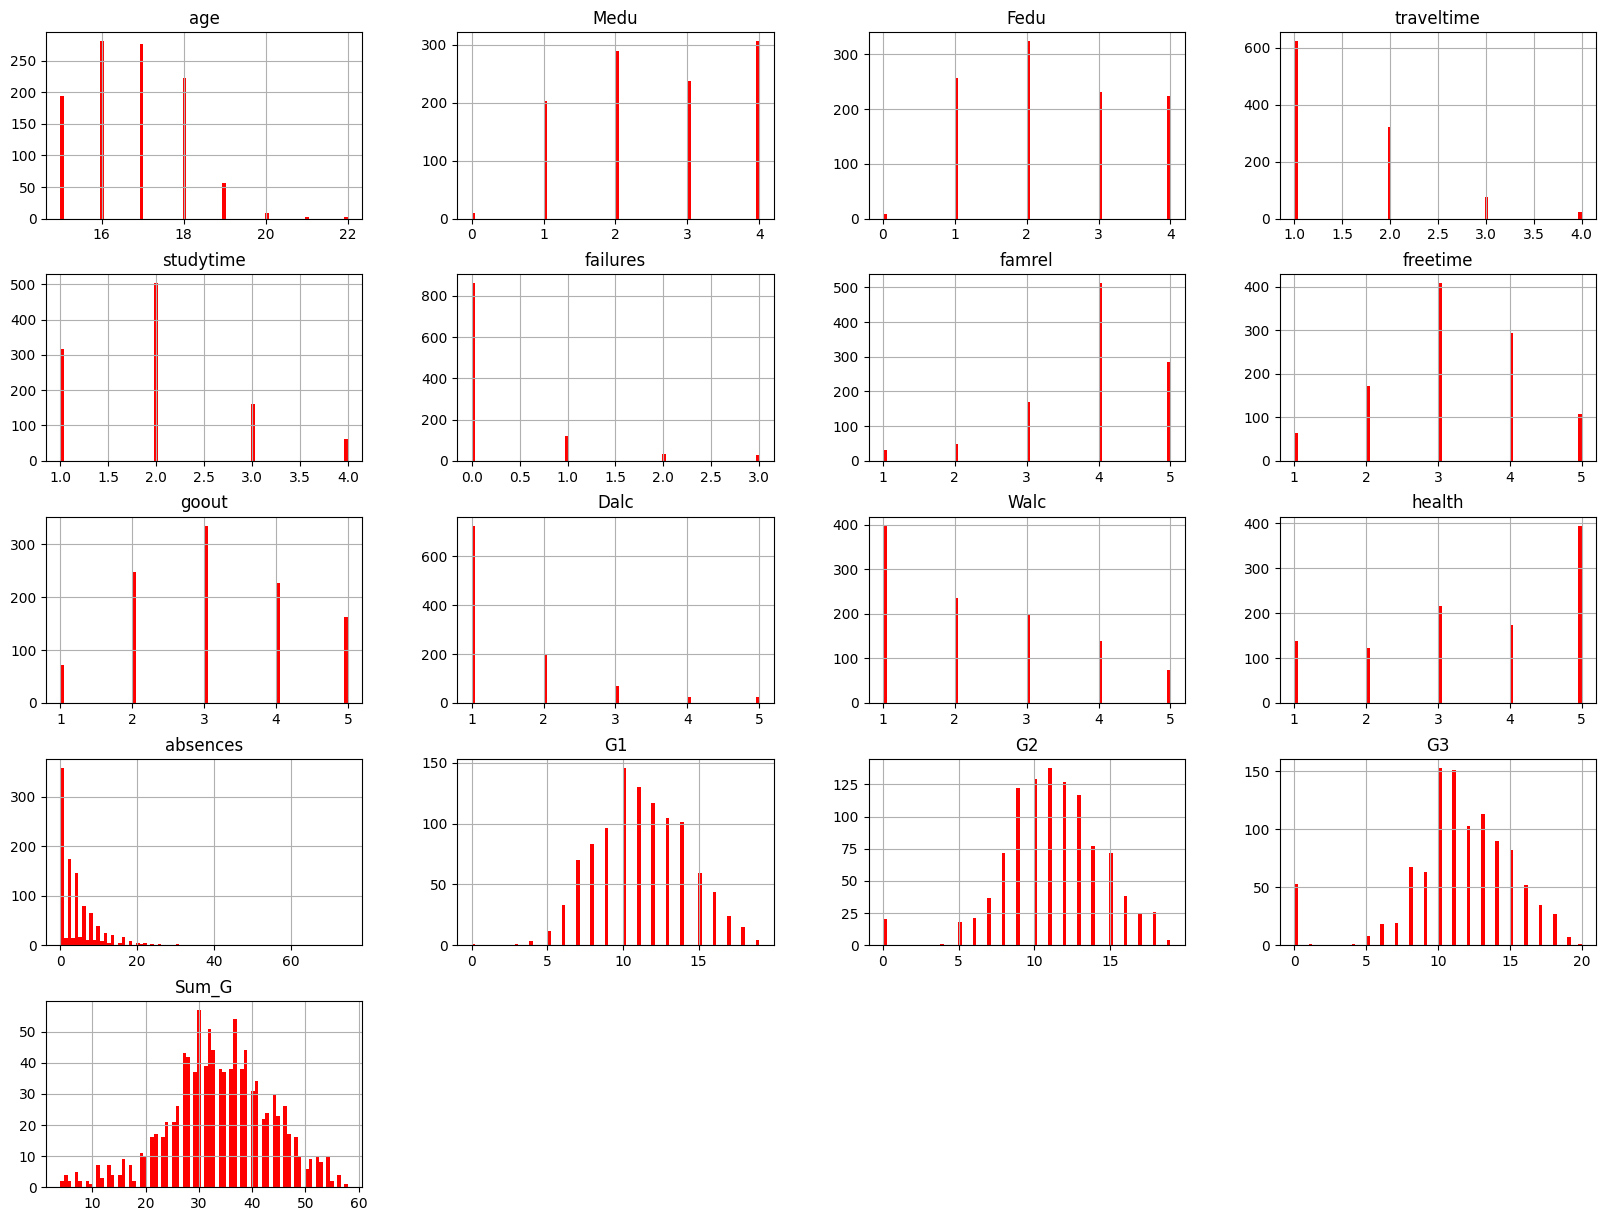

In [16]:
combined_data.hist(bins=80, figsize=(20,15), color='r')
plt.show()

In [17]:
feature = (lambda col: col/col.sum())
index = ['Poor','Fair','Excellent']

<ipython-input-18-76ec109f5dd8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=combined_data['sex'],palette="viridis" )


Text(0, 0.5, 'Number of students')

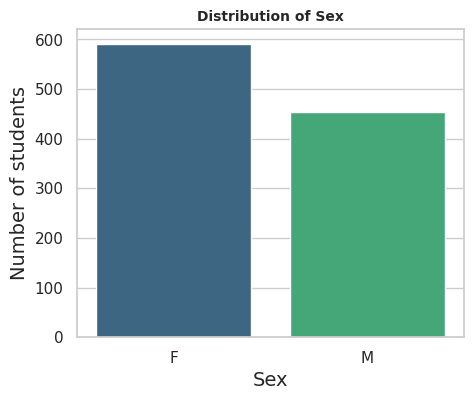

In [18]:
#Sex
sns.set(style="whitegrid")
plt.figure(figsize=(5, 4))
sns.countplot(x=combined_data['sex'],palette="viridis" )
plt.title('Distribution of Sex', fontsize=10, fontweight='bold')
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Number of students', fontsize=14)

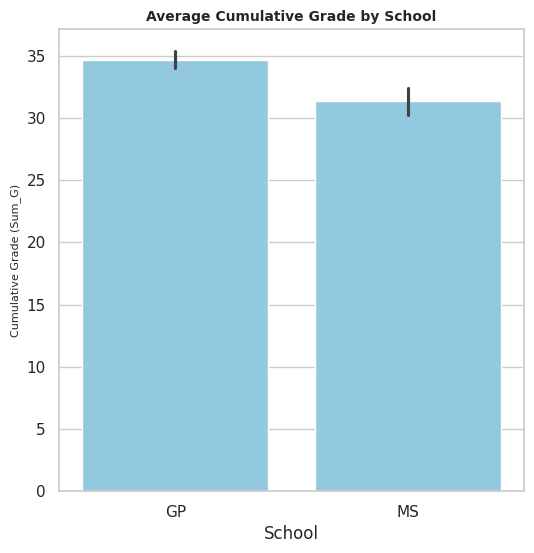

In [19]:

sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
sns.barplot(x='school',y='Sum_G',data=combined_data,color='skyblue')
plt.title('Average Cumulative Grade by School', fontsize=10, fontweight='bold')
plt.xlabel('School', fontsize=12)
plt.ylabel('Cumulative Grade (Sum_G)', fontsize=8)

plt.show()

<Axes: xlabel='freetime', ylabel='Sum_G'>

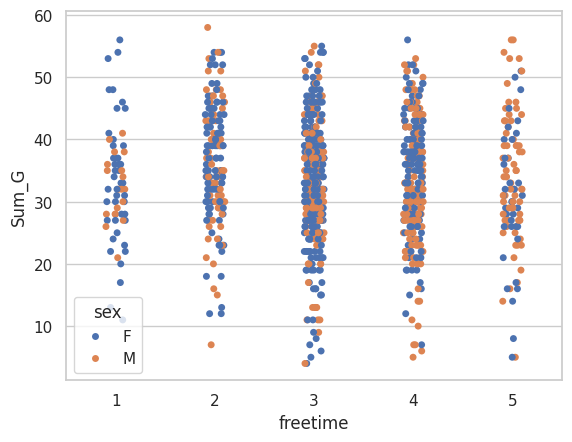

In [20]:
sns.stripplot(x='freetime',y='Sum_G',data=combined_data,hue='sex',jitter=True)

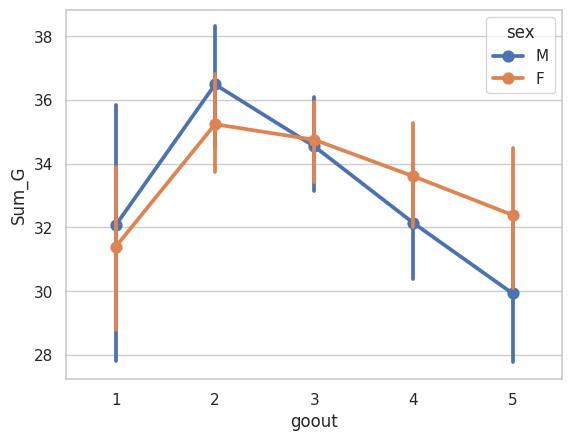

In [21]:
sns.pointplot(x="goout", y="Sum_G", hue="sex", data=combined_data)
plt.show()

<Axes: xlabel='higher', ylabel='Sum_G'>

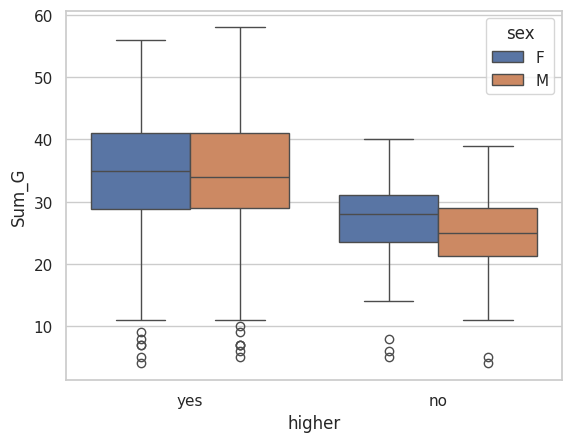

In [22]:
sns.boxplot(x='higher',y='Sum_G',hue='sex',data=combined_data)

<Axes: xlabel='G3'>

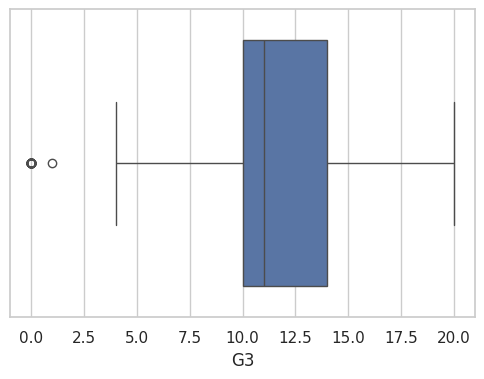

In [23]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=combined_data.G3)

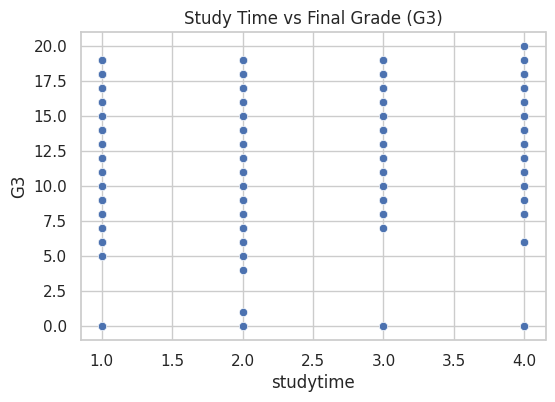

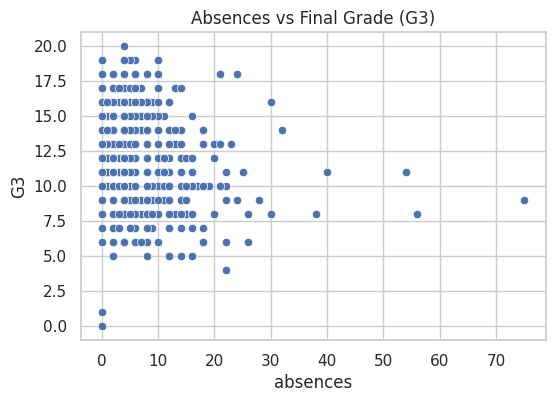

In [24]:
# Scatter plot between 'studytime' and final grade 'G3'
plt.figure(figsize=(6, 4))
sns.scatterplot(data=combined_data, x='studytime', y='G3')
plt.title('Study Time vs Final Grade (G3)')
plt.show()
# Scatter plot between 'absences' and final grade 'G3'
plt.figure(figsize=(6, 4))
sns.scatterplot(data=combined_data, x='absences', y='G3')
plt.title('Absences vs Final Grade (G3)')
plt.show()

Text(0.5, 0, 'Final Grade')

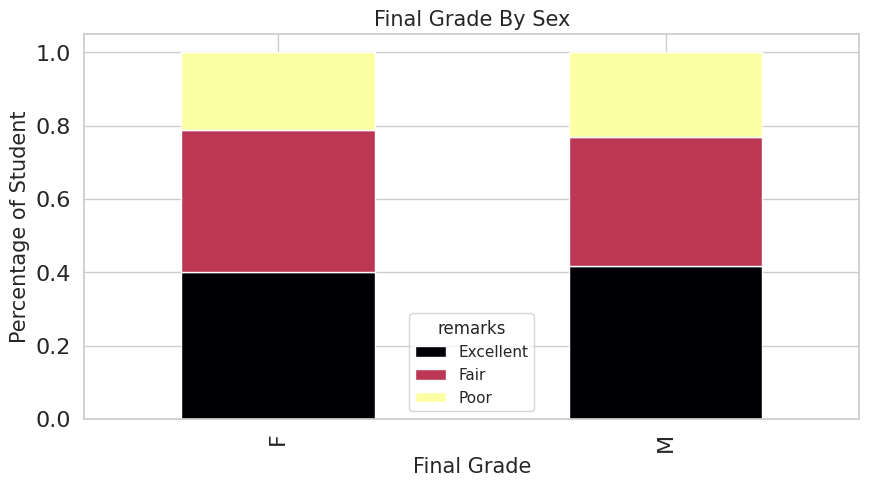

In [25]:
sen = pd.crosstab(combined_data.remarks, combined_data.sex)
operc = sen.apply(feature)
operc = operc.T
operc.plot.bar(colormap = "inferno", fontsize = 16, figsize = (10,5), stacked = True)
plt.title('Final Grade By Sex', fontsize = 15)
plt.ylabel('Percentage of Student', fontsize = 15)
plt.xlabel('Final Grade', fontsize = 15)

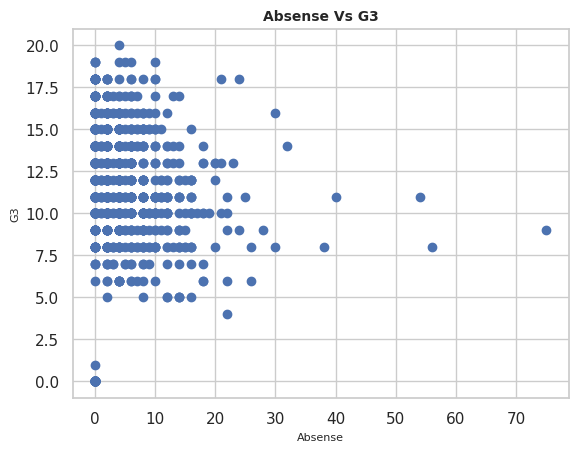

In [26]:
#relationship between marks and absences
plt.scatter(x='absences',y='G3',data=combined_data)
plt.title("Absense Vs G3", fontsize=10, fontweight='bold')
plt.xlabel("Absense", fontsize=8)
plt.ylabel("G3", fontsize=8)
plt.show()

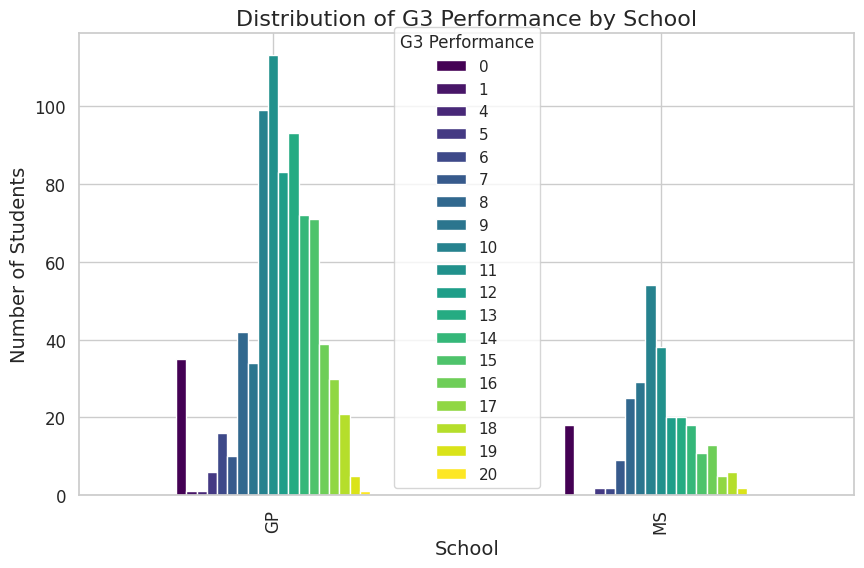

In [27]:
outschool = pd.crosstab(combined_data['school'], combined_data['G3'])

# Vẽ biểu đồ cột
outschool.plot(kind='bar', colormap='viridis', fontsize=12, figsize=(10, 6))
plt.title('Distribution of G3 Performance by School', fontsize=16)
plt.xlabel('School', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.legend(title='G3 Performance')
plt.show()

<Axes: xlabel='higher', ylabel='failures'>

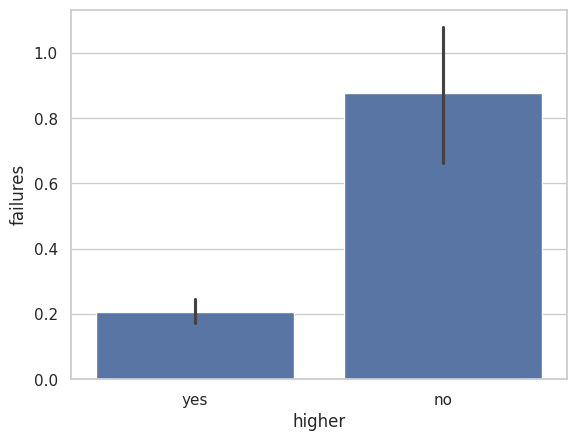

In [28]:
#failures can affect higher education
sns.barplot(x='higher',y='failures',data=combined_data)

Text(0.5, 0, 'Final Grade')

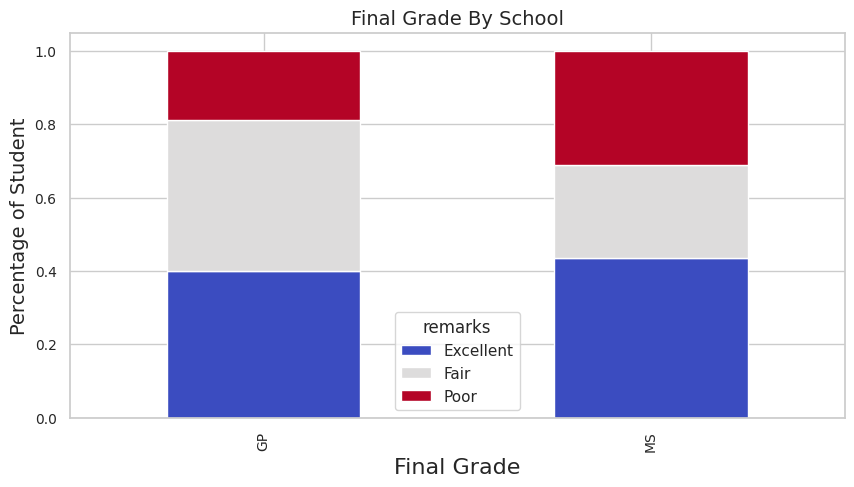

In [29]:
out_tab = pd.crosstab(combined_data.school, combined_data.remarks)
out_perc = out_tab.apply(feature, axis = 1)
out_perc.plot.bar(colormap="coolwarm", fontsize=10, figsize=(10,5), stacked = True)
plt.title('Final Grade By School', fontsize=14)
plt.ylabel('Percentage of Student', fontsize=14)
plt.xlabel('Final Grade', fontsize=16)

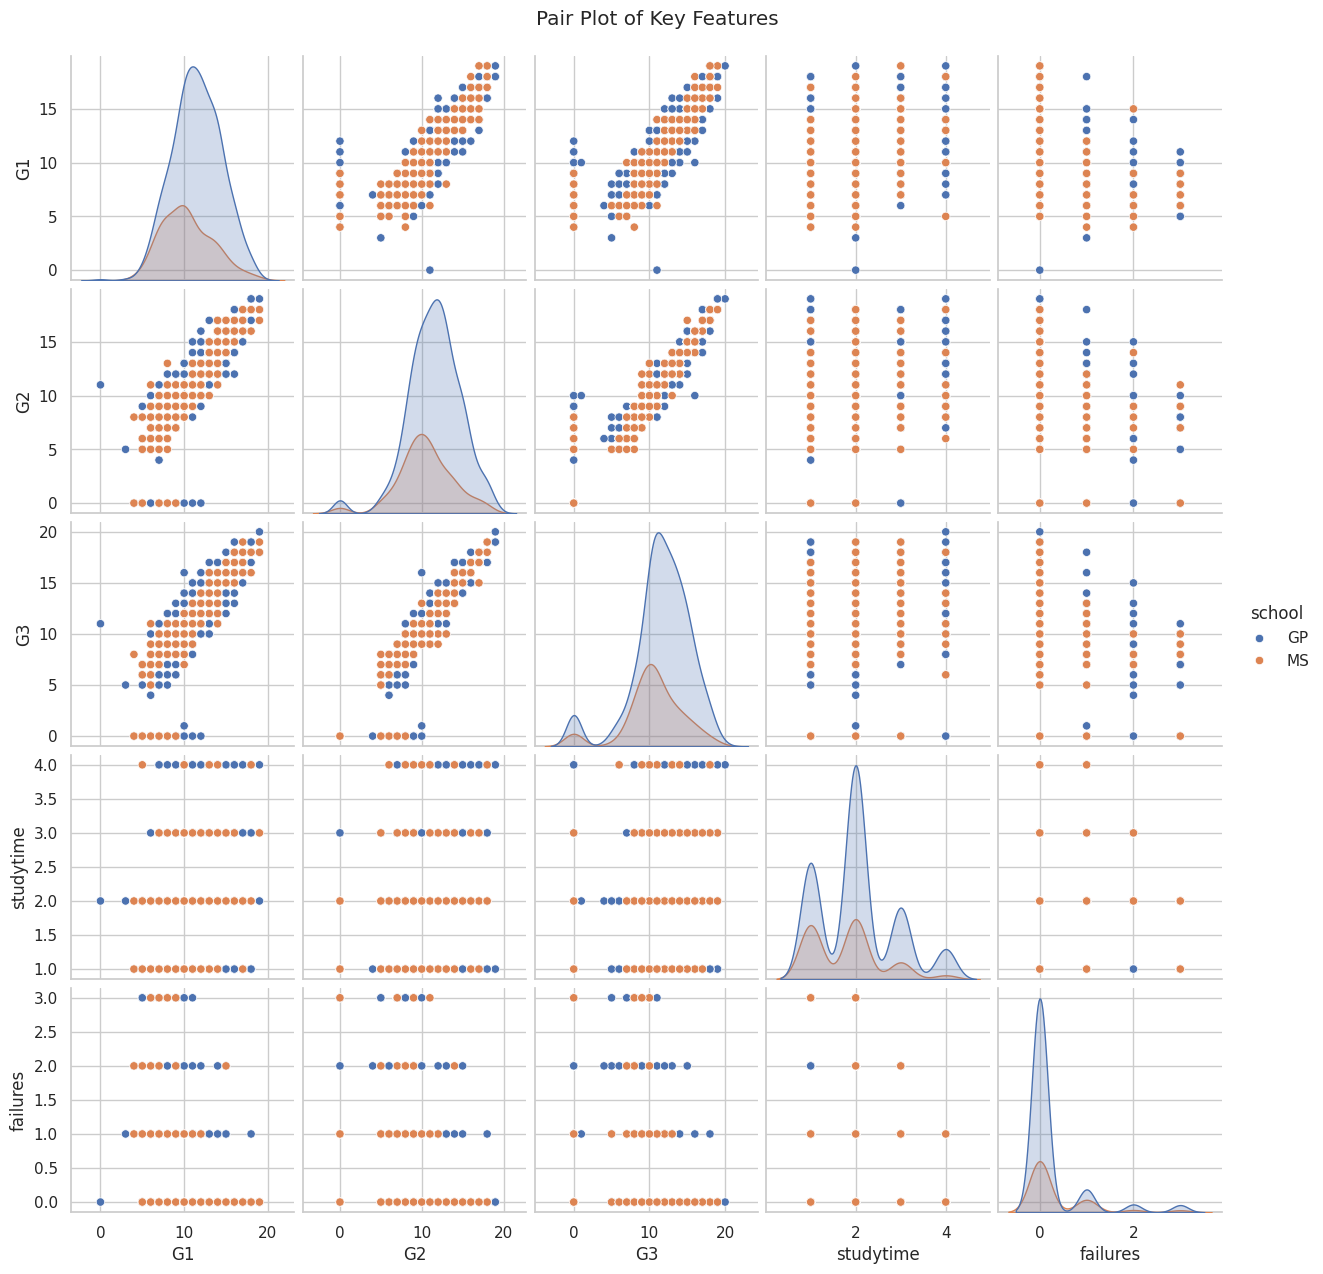

In [30]:
# Pair plot for selected features related to grades
sns.pairplot(combined_data, vars=['G1', 'G2', 'G3', 'studytime', 'failures'], hue='school')
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

In [31]:
df20 = px.data.gapminder()
fig = px.bar(combined_data, x='age', y='failures',
             hover_data=['absences', 'failures','Sum_G'], color='higher',
              height=500)
fig.show()

# ***TRAIN AND EVALUATION***

In [32]:
data_normalized['G3'] = data_normalized['G3'].apply(lambda x: 1 if x >= 10 else 0)
X = data_normalized.drop(columns=['G3'])  # Features

y_clf = data_normalized['G3']  # Target variable
y_reg = data['G3']               # Target

X_train, X_test,     y_train_clf, y_test_clf,    y_train_reg, y_test_reg = train_test_split(X, y_clf, y_reg, test_size=0.2, random_state=42)

# ***THỰC HIỆN PHÂN LOẠI VÀ HỒI QUY***

#CLASSIFICATION------------------------------------------------------------

#LogisticRegression

In [33]:
model = LogisticRegression()
model.fit(X_train, y_train_clf)
# Evaluate the model
y_pred = model.predict(X_test)
accuracy_lgt = accuracy_score(y_test_clf, y_pred)
report = classification_report(y_test_clf, y_pred)

print(f"Accuracy: {accuracy_lgt}")
print("Classification Report:")
print(report)

Accuracy: 0.8421052631578947
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.53      0.66        60
           1       0.84      0.97      0.90       149

    accuracy                           0.84       209
   macro avg       0.85      0.75      0.78       209
weighted avg       0.85      0.84      0.83       209



#DecisionTreeClassifier

In [34]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train_clf)

#Evaluate the model
y_pred = clf.predict(X_test)
accuracy_dt = accuracy_score(y_test_clf, y_pred)

print(f"Model Accuracy: {accuracy_dt * 100:.2f}%")

Model Accuracy: 85.65%


#NaiveBayesClassifier

In [35]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train_clf)


y_pred = nb_clf.predict(X_test)
accuracy_nb = accuracy_score(y_test_clf, y_pred)

print(f"Model Accuracy: {accuracy_nb * 100:.2f}%")

Model Accuracy: 82.30%


#Compare 3 medthods Classification

Logistic regression: 0.8421052631578947
Decision Tree: 0.8564593301435407
Naive Bayes: 0.8229665071770335


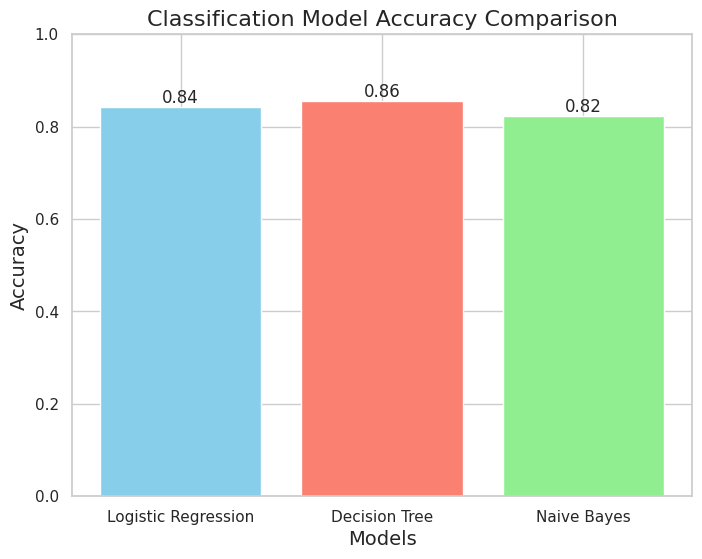

In [36]:
print('Logistic regression: {}'.format(accuracy_lgt))
print('Decision Tree: {}'.format(accuracy_dt))
print('Naive Bayes: {}'.format(accuracy_nb))

models = ['Logistic Regression', 'Decision Tree', 'Naive Bayes']
accuracies = [accuracy_lgt, accuracy_dt, accuracy_nb]

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'salmon', 'lightgreen'])

# Add title and labels
plt.title('Classification Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Add accuracy values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}', ha='center', va='bottom', fontsize=12)

# Display the plot
plt.ylim(0, 1)
plt.show()


#REGRESSION------------------------------------------------------------

#LinearRegression

In [37]:
modelRe = LinearRegression()
modelRe.fit(X_train, y_train_reg)

y_pred = modelRe.predict(X_test)
mse_ln = mean_squared_error(y_test_reg, y_pred)
r2 = r2_score(y_test_reg, y_pred)
print("LinearRegression")
print(f"Mean Squared Error: {mse_ln}")
print(f"R^2 Score: {r2}")

LinearRegression
Mean Squared Error: 3.0973651766402974
R^2 Score: 0.79966356659595


#SVR

In [38]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Using RBF kernel for regression
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train_reg)

# Step 7: Make Predictions and Evaluate Model
y_pred = svr_model.predict(X_test)

# Evaluation Metrics
mse_svr = mean_squared_error(y_test_reg, y_pred)
mae = mean_absolute_error(y_test_reg, y_pred)
r2 = r2_score(y_test_reg, y_pred)

print(f"Mean Squared Error: {mse_svr}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error: 6.210977854585553
Mean Absolute Error: 1.57
R2 Score: 0.60


#K-Nearest Neighbor

In [39]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train_reg)


y_pred = knn_regressor.predict(X_test)
mse_knn = mean_squared_error(y_test_reg, y_pred)
rmse = np.sqrt(mse_knn)
r2 = r2_score(y_test_reg, y_pred)

print(f"Model MSE: {mse_knn:.2f}")
print(f"Model RMSE: {rmse:.2f}")
print(f"Model R^2 Score: {r2:.2f}")

Model MSE: 12.00
Model RMSE: 3.46
Model R^2 Score: 0.22


#Compare 3 medthods Regression

LinearRegression: 3.0973651766402974
SVR: 6.210977854585553
KNN: 11.99980861244019


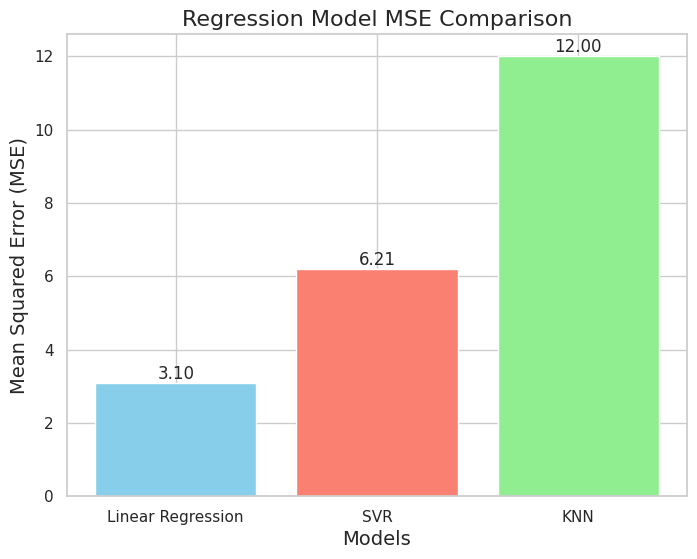

In [40]:
print('LinearRegression: {}'.format(mse_ln))
print('SVR: {}'.format(mse_svr))
print('KNN: {}'.format(mse_knn))

models = ['Linear Regression', 'SVR', 'KNN']
mse_values = [mse_ln, mse_svr, mse_knn]

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(models, mse_values, color=['skyblue', 'salmon', 'lightgreen'])

# Add title and labels
plt.title('Regression Model MSE Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)', fontsize=14)

# Add MSE values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()

#-------------------------------OVERFITTING--------------------------------

Classification

In [41]:
#LogisticsRegression OverFitting
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train_clf)

# Best model
model = grid.best_estimator_
# Step 6: Evaluate the model
y_pred = model.predict(X_test)
accuracy_lgt_ovf = accuracy_score(y_test_clf, y_pred)
report = classification_report(y_test_clf, y_pred)

print(f"Best Regularization Parameter: {grid.best_params_['C']}")
print(f"Model Accuracy: {accuracy_lgt_ovf * 100:.2f}%")

Best Regularization Parameter: 10
Model Accuracy: 86.60%


In [42]:
#Decision Tree OverFitting
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_leaf_nodes': [10, 20, 30, None]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_clf)

clf = grid_search.best_estimator_

y_pred = clf.predict(X_test)
accuracy_dt_ovf = accuracy_score(y_test_clf, y_pred)

print("Best parameters found: ", grid_search.best_params_)
print(f"Model Accuracy: {accuracy_dt_ovf * 100:.2f}%")

Best parameters found:  {'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Model Accuracy: 87.56%


In [43]:
param_grid = {
    'var_smoothing': np.logspace(-12, -8, num=10)  # Try different smoothing values
}

# Set up GridSearchCV with k-fold cross-validation
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_clf)

# Best parameters found
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model on test set
best_nb_model = grid_search.best_estimator_
y_pred = best_nb_model.predict(X_test)
accuracy_nb_ovf = accuracy_score(y_test_clf, y_pred)

print(f"Test Set Accuracy with Best Parameters: {accuracy_nb_ovf * 100}%")


Best Parameters: {'var_smoothing': 1e-12}
Test Set Accuracy with Best Parameters: 82.29665071770334%


Regression

In [44]:
#LinearRegression  OverFitting
poly_model = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())
poly_model.fit(X_train, y_train_reg)
# Cross-Validation
cv_scores = cross_val_score(poly_model, X_train, y_train_reg, cv=5, scoring='r2')
print("Cross-Validation R^2 Scores:", cv_scores)
print("Mean CV R^2 Score:", cv_scores.mean())

y_pred_poly = poly_model.predict(X_test)
mse_poly_ovf = mean_squared_error(y_test_reg, y_pred_poly)
r2_poly = r2_score(y_test_reg, y_pred_poly)

print("Polynomial Regression (degree=1)")
print(f"Mean Squared Error: {mse_poly_ovf}")
print(f"R^2 Score: {r2_poly}")

Cross-Validation R^2 Scores: [0.82891327 0.75108693 0.84105252 0.90336951 0.86678345]
Mean CV R^2 Score: 0.8382411376722503
Polynomial Regression (degree=1)
Mean Squared Error: 3.097365176640295
R^2 Score: 0.7996635665959501


In [45]:
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf', 'linear']
}

# Set up GridSearchCV with 5-fold cross-validation directly
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train_reg)

# Best parameters found
print("Best Parameters:", grid_search.best_params_)

# Use the best model to make predictions on the test set
best_svr_model = grid_search.best_estimator_
y_pred = best_svr_model.predict(X_test)

# Calculate evaluation metrics
mse_svr_ovf = mean_squared_error(y_test_reg, y_pred)
mae = mean_absolute_error(y_test_reg, y_pred)
r2 = r2_score(y_test_reg, y_pred)

# Print results
print(f"Mean Squared Error: {mse_svr_ovf:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")


Best Parameters: {'C': 10.0, 'epsilon': 0.01, 'kernel': 'linear'}
Mean Squared Error: 3.06
Mean Absolute Error: 0.91
R2 Score: 0.80


In [46]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}


grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train_reg)

# Get the best parameters from the grid search
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model with the best parameters on the test set
best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(X_test)

# Calculate MSE, RMSE, and R^2 score for the test set
mse_knn_ovf = mean_squared_error(y_test_reg, y_pred)
rmse = np.sqrt(mse_knn)
r2 = r2_score(y_test_reg, y_pred)

# Print results
print(f"Model MSE: {mse_knn_ovf:.2f}")
print(f"Model RMSE: {rmse:.2f}")
print(f"Model R^2 Score: {r2:.2f}")


Best Parameters: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Model MSE: 10.08
Model RMSE: 3.46
Model R^2 Score: 0.35


#Compare before and after apply Overfitting method

#Classification

In [47]:

print(f"{'Model':<20} | {'Before':<10} | {'After':<10}")
print("-" * 46)


print(f"{'DecisionTree':<20} | {accuracy_dt:<10.4f} | {accuracy_dt_ovf:<10.4f}")
print(f"{'LogisticRegression':<20} | {accuracy_lgt:<10.4f} | {accuracy_lgt_ovf:<10.4f}")
print(f"{'GaussianNB':<20} | {accuracy_nb:<10.4f} | {accuracy_nb_ovf:<10.4f}")


Model                | Before     | After     
----------------------------------------------
DecisionTree         | 0.8565     | 0.8756    
LogisticRegression   | 0.8421     | 0.8660    
GaussianNB           | 0.8230     | 0.8230    


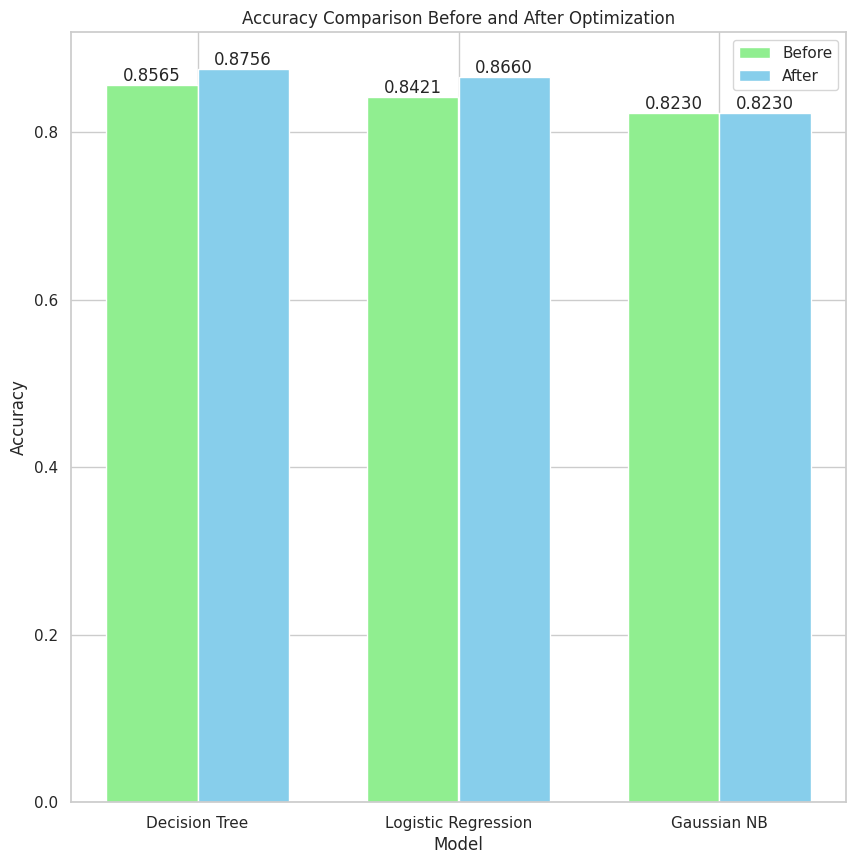

In [48]:
import matplotlib.pyplot as plt
# Model names and accuracy values for "Before" and "After"
models = ['Decision Tree', 'Logistic Regression', 'Gaussian NB']
accuracy_before = [accuracy_dt, accuracy_lgt, accuracy_nb]
accuracy_after = [accuracy_dt_ovf, accuracy_lgt_ovf, accuracy_nb_ovf]

x = range(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 10))
bars1 = ax.bar(x, accuracy_before, width, label='Before', color='lightgreen')
bars2 = ax.bar([i + width for i in x], accuracy_after, width, label='After', color='skyblue')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison Before and After Optimization')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(models)
ax.legend()

for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.4f}', ha='center', va='bottom')

plt.show()


#Regression

In [49]:
print(f"{'Model':<20} | {'Before':<10} | {'After':<10}")
print("-" * 46)

print(f"{'LinearRegression':<20} | {mse_ln:<10.4f} | {mse_poly_ovf:<10.4f}")
print(f"{'SVR':<20} | {mse_svr:<10.4f} | {mse_svr_ovf:<10.4f}")
print(f"{'KNN':<20} | {mse_knn:<10.4f} | {mse_knn_ovf:<10.4f}")


Model                | Before     | After     
----------------------------------------------
LinearRegression     | 3.0974     | 3.0974    
SVR                  | 6.2110     | 3.0567    
KNN                  | 11.9998    | 10.0768   


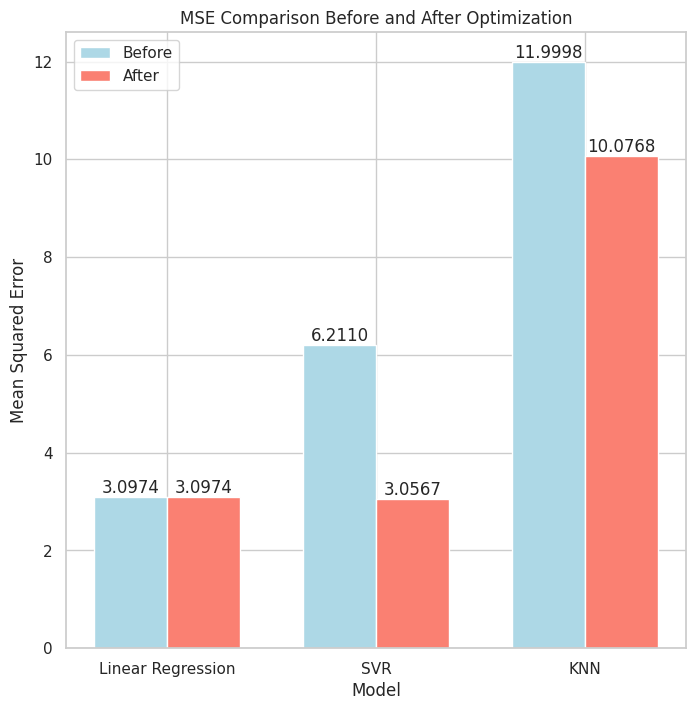

In [50]:
import matplotlib.pyplot as plt

# Model names and MSE values for "Before" and "After"
models = ['Linear Regression', 'SVR', 'KNN']
mse_before = [mse_ln, mse_svr, mse_knn]
mse_after = [mse_poly_ovf, mse_svr_ovf, mse_knn_ovf]

x = range(len(models))
width = 0.35


fig, ax = plt.subplots(figsize=(8, 8))
bars1 = ax.bar(x, mse_before, width, label='Before', color='lightblue')
bars2 = ax.bar([i + width for i in x], mse_after, width, label='After', color='salmon')

ax.set_xlabel('Model')
ax.set_ylabel('Mean Squared Error')
ax.set_title('MSE Comparison Before and After Optimization')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(models)
ax.legend()

for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.4f}', ha='center', va='bottom')


plt.show()


#FEATURE SELECTION USING CORRELATION ANALYSIS
------------------------------------------------------------

#Calculate the Correlation Matrix and Plot the Heatmap

In [51]:
data_math = pd.read_csv('student-mat.csv', delimiter=';')
data_por = pd.read_csv('student-por.csv', delimiter=';')

data_math['subject'] = 'math'
data_por['subject'] = 'portuguese'

combined_data = pd.concat([data_math, data_por], ignore_index=True)

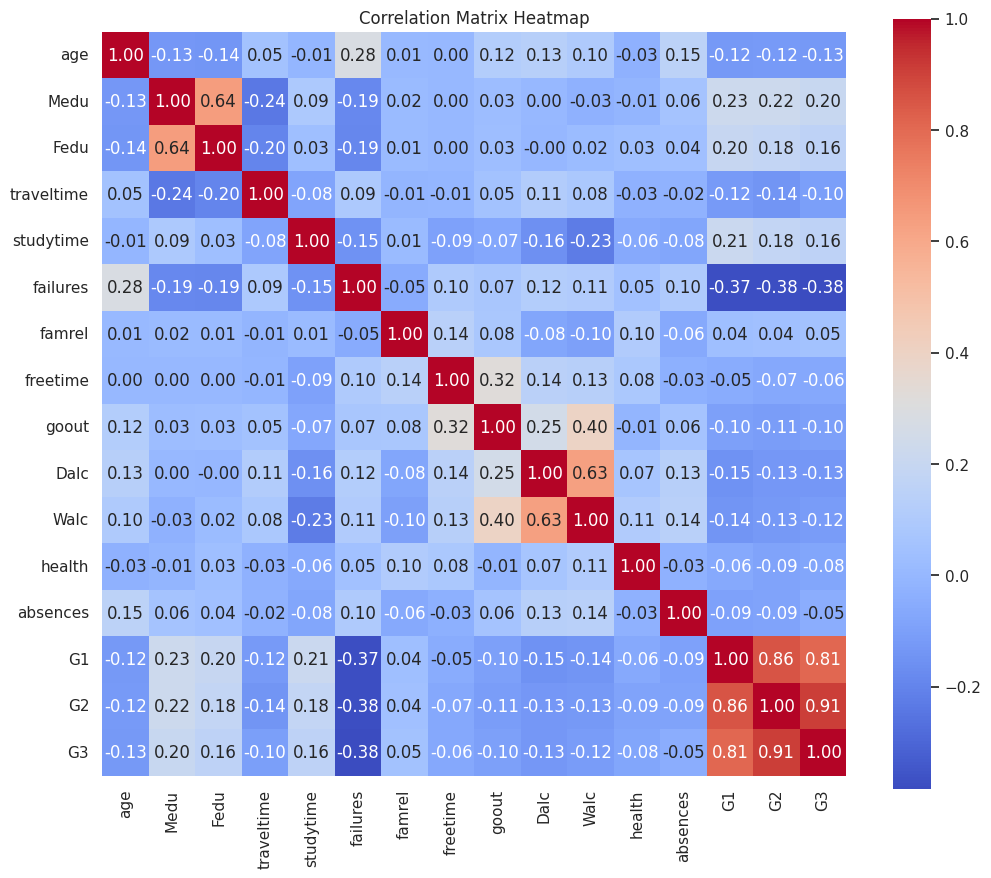

In [52]:
numerical_features = combined_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
corr_matrix = combined_data[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

#Calculate the correlation between the target variable and other features

In [53]:
target = abs(corr_matrix['G3'])
print(target)

age           0.125282
Medu          0.201472
Fedu          0.159796
traveltime    0.102627
studytime     0.161629
failures      0.383145
famrel        0.054461
freetime      0.064890
goout         0.097877
Dalc          0.129642
Walc          0.115740
health        0.080079
absences      0.045671
G1            0.809142
G2            0.910743
G3            1.000000
Name: G3, dtype: float64


#Select features

In [54]:
correlations = corr_matrix['G3'].abs().drop('G3')

threshold = 0.3
strong_corr_features = correlations[correlations > threshold].index.tolist()
print("Features strongly correlated with G3:", strong_corr_features)

Features strongly correlated with G3: ['failures', 'G1', 'G2']


#Retrain the model

In [55]:
data=combined_data
df = pd.DataFrame(data)

df.to_csv(r"products.csv", index=False)
data = pd.get_dummies(data, drop_first=True)

scaler = MinMaxScaler()
numerical_features = data.drop(columns=['G3'])
scaled_features = scaler.fit_transform(numerical_features)
data_normalized = pd.DataFrame(scaled_features, columns=numerical_features.columns)
data_normalized['G3'] = data['G3']

data_normalized.drop_duplicates(inplace=True)
data_normalized.to_csv('preprocessed_student_por.csv', index=False)

In [56]:
correlation_threshold = 0.3
data_normalized['G3'] = data_normalized['G3'].apply(lambda x: 1 if x >= 10 else 0)
correlation_matrix = data_normalized.corr()
correlation_with_target = correlation_matrix['G3'].drop('G3')
selected_features = correlation_with_target[correlation_with_target.abs() > correlation_threshold].index

print("Các đặc trưng được chọn với ngưỡng tương quan > 0.3:")
print(selected_features)

X = data_normalized[selected_features]
y_clf = data_normalized['G3']
y_reg = data['G3']

X_train, X_test, y_train_clf, y_test_clf, y_train_reg, y_test_reg = train_test_split(
    X, y_clf, y_reg, test_size=0.2, random_state=42)


print("Số lượng đặc trưng được chọn:", len(selected_features))

Các đặc trưng được chọn với ngưỡng tương quan > 0.3:
Index(['failures', 'G1', 'G2'], dtype='object')
Số lượng đặc trưng được chọn: 3


Classification

In [57]:
# LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train_clf)

y_pred = model.predict(X_test)
accuracy_lgt_fs = accuracy_score(y_test_clf, y_pred)
report = classification_report(y_test_clf, y_pred)

print(f"Model Accuracy: {accuracy_lgt_fs * 100:.2f}%")

Model Accuracy: 83.73%


In [58]:
# DecisionTree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train_clf)

y_pred = clf.predict(X_test)
accuracy_dt_fs = accuracy_score(y_test_clf, y_pred)

print(f"Model Accuracy: {accuracy_dt_fs * 100:.2f}%")

Model Accuracy: 88.04%


In [59]:
# NB Classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train_clf)


y_pred = nb_clf.predict(X_test)
accuracy_nb_fs = accuracy_score(y_test_clf, y_pred)

print(f"Model Accuracy: {accuracy_nb_fs * 100:.2f}%")

Model Accuracy: 87.08%


Regression

In [60]:
# LinearRegression
modelRe = LinearRegression()
modelRe.fit(X_train, y_train_reg)

y_pred = modelRe.predict(X_test)
mse_ln_fs = mean_squared_error(y_test_reg, y_pred)
r2 = r2_score(y_test_reg, y_pred)
print("LinearRegression")
print(f"Mean Squared Error: {mse_ln_fs}")

LinearRegression
Mean Squared Error: 2.9939701395187566


In [61]:
# SVR
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train_reg)

y_pred = svr_model.predict(X_test)

mse_svr_fs = mean_squared_error(y_test_reg, y_pred)
mae = mean_absolute_error(y_test_reg, y_pred)
r2 = r2_score(y_test_reg, y_pred)

print(f"Mean Squared Error: {mse_svr_fs}")

Mean Squared Error: 3.3056527100862634


In [62]:
# K-Nearest Neighbor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train_reg)


y_pred = knn_regressor.predict(X_test)
mse_knn_fs = mean_squared_error(y_test_reg, y_pred)
rmse = np.sqrt(mse_knn)
r2 = r2_score(y_test_reg, y_pred)

print(f"Model MSE: {mse_knn_fs}")

Model MSE: 3.6704306220095693


#Before and After Feature Selection Using Correlation Analysis

Classification

In [63]:
print(f"{'Model':<20} | {'Before':<10} | {'After':<10}")
print("-" * 46)


print(f"{'DecisionTree':<20} | {accuracy_dt:<10.4f} | {accuracy_dt_fs:<10.4f}")
print(f"{'LogisticRegression':<20} | {accuracy_lgt:<10.4f} | {accuracy_lgt_fs:<10.4f}")
print(f"{'GaussianNB':<20} | {accuracy_nb:<10.4f} | {accuracy_nb_fs:<10.4f}")

Model                | Before     | After     
----------------------------------------------
DecisionTree         | 0.8565     | 0.8804    
LogisticRegression   | 0.8421     | 0.8373    
GaussianNB           | 0.8230     | 0.8708    


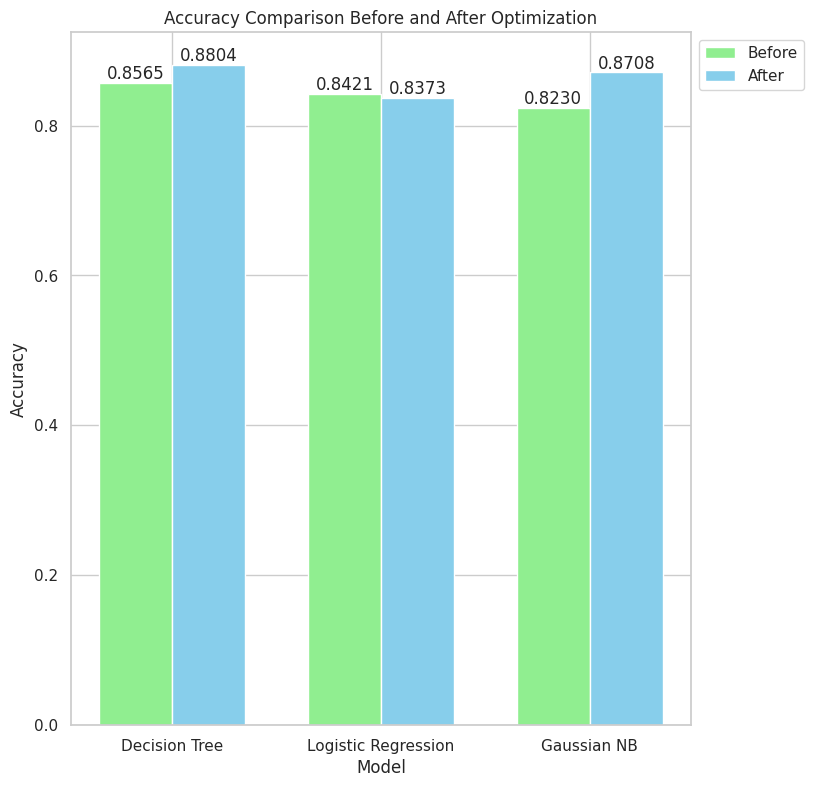

In [64]:
models = ['Decision Tree', 'Logistic Regression', 'Gaussian NB']
accuracy_before = [accuracy_dt, accuracy_lgt, accuracy_nb]
accuracy_after = [accuracy_dt_fs, accuracy_lgt_fs, accuracy_nb_fs]

x = range(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 9))
bars1 = ax.bar(x, accuracy_before, width, label='Before', color='lightgreen')
bars2 = ax.bar([i + width for i in x], accuracy_after, width, label='After', color='skyblue')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison Before and After Optimization')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(models)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
#ax.legend()

for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.4f}', ha='center', va='bottom')

plt.show()

Regression

In [65]:
print(f"{'Model':<20} | {'Before':<10} | {'After':<10}")
print("-" * 46)

print(f"{'LinearRegression':<20} | {mse_ln:<10.4f} | {mse_ln_fs:<10.4f}")
print(f"{'SVR':<20} | {mse_svr:<10.4f} | {mse_svr_fs:<10.4f}")
print(f"{'KNN':<20} | {mse_knn:<10.4f} | {mse_knn_fs:<10.4f}")

Model                | Before     | After     
----------------------------------------------
LinearRegression     | 3.0974     | 2.9940    
SVR                  | 6.2110     | 3.3057    
KNN                  | 11.9998    | 3.6704    


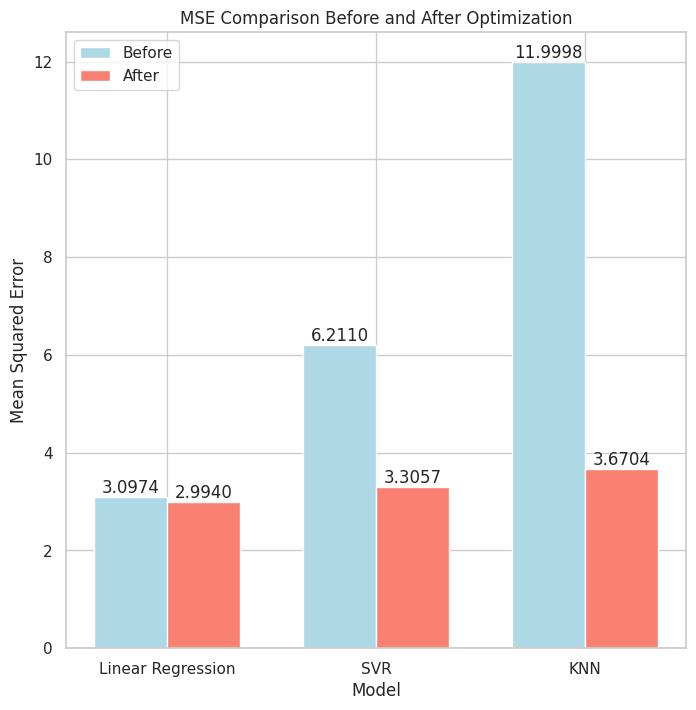

In [66]:
models = ['Linear Regression', 'SVR', 'KNN']
mse_before = [mse_ln, mse_svr, mse_knn]
mse_after = [mse_ln_fs, mse_svr_fs, mse_knn_fs]

x = range(len(models))
width = 0.35


fig, ax = plt.subplots(figsize=(8, 8))
bars1 = ax.bar(x, mse_before, width, label='Before', color='lightblue')
bars2 = ax.bar([i + width for i in x], mse_after, width, label='After', color='salmon')

ax.set_xlabel('Model')
ax.set_ylabel('Mean Squared Error')
ax.set_title('MSE Comparison Before and After Optimization')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(models)
ax.legend()

for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.4f}', ha='center', va='bottom')


plt.show()